## Fuzzy

19/05/2021 FCM

Пример кластеризации с Fuzzy C-means при k = 2,...,10

In [93]:
?fuzz.cluster.cmeans

In [1]:
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import tables

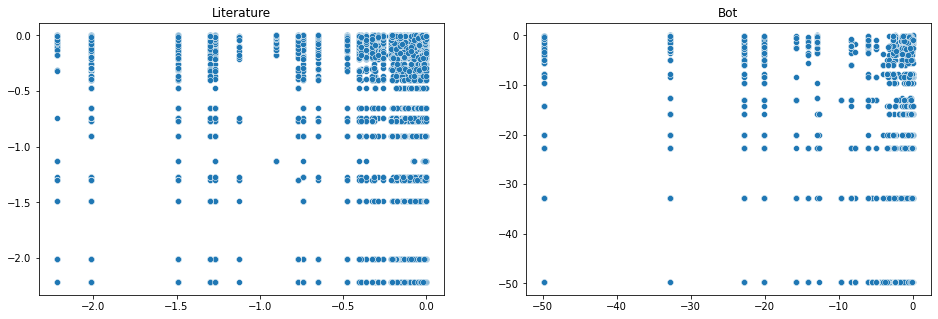

In [2]:
with tables.open_file('../ENG/embs/lit/the_sorrows_of_young_werther_en_boylan' + '/e%d_%d.h5' % (1, 2), mode='r') as f:
    X = (f.root.data[:,:])
with tables.open_file('../ENG/embs/bot/processed_lstm__anna_karenina' + '/e%d_%d.h5' % (1, 2), mode='r') as f:
    X_bot = (f.root.data[:,:])
fig, axs = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x=X[:,0], y=X[:,1], ax=axs[0])
axs[0].set_title('Literature')
sns.scatterplot(x=X_bot[:,0], y=X_bot[:,1], ax=axs[1])
axs[1].set_title('Bot')
plt.show()

In [3]:
import skfuzzy as fuzz
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

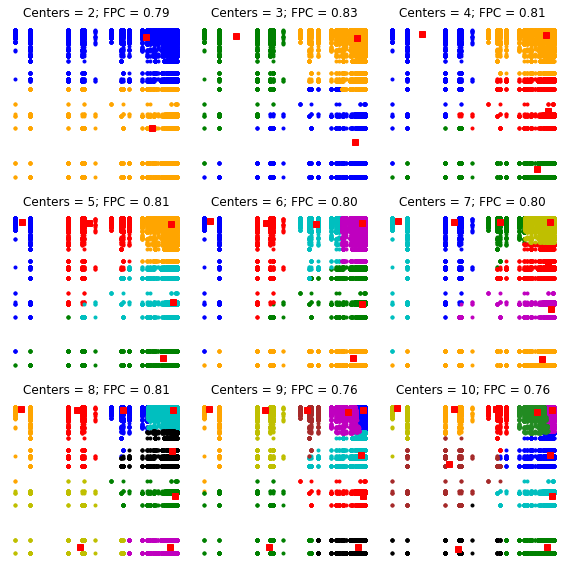

In [4]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
xpts, ypts = X[:,0], X[:,1]
alldata = X.T
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

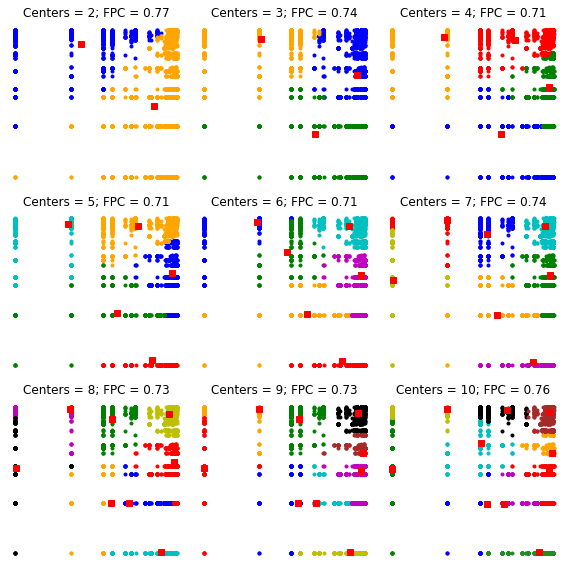

In [9]:
fig2, axes2 = plt.subplots(3, 3, figsize=(8, 8))
xpts, ypts = X_bot[:,0], X_bot[:,1]
alldata = X_bot.T
fpcs = []

for ncenters, ax in enumerate(axes2.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig2.tight_layout()

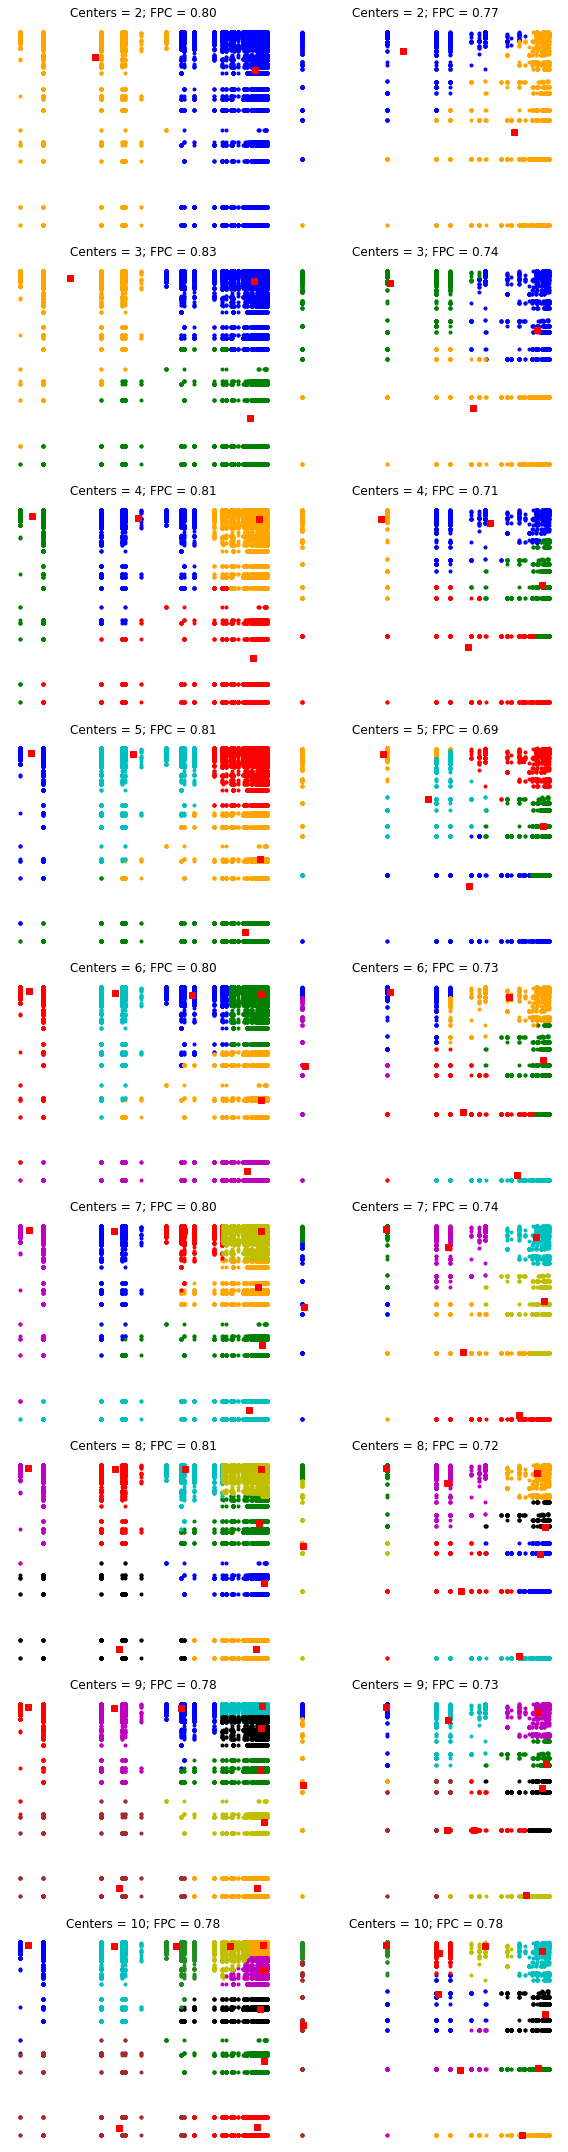

In [5]:
fig, axes = plt.subplots(9, 2, figsize=(8, 30))
xpts, ypts = X[:,0], X[:,1]
alldata = X.T
xpts_bot, ypts_bot = X_bot[:,0], X_bot[:,1]
alldata_bot = X_bot.T
fpcs = []
fpcs_bot = []

for ncenters, (ax, ax_) in enumerate(zip(axes[:,0], axes[:,1]), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

    cntr_, u_, u0_, d_, jm_, p_, fpc_ = fuzz.cluster.cmeans(
        alldata_bot, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs_bot.append(fpc_)

    # Plot assigned clusters, for each data point in training set
    cluster_membership_ = np.argmax(u_, axis=0)
    for j in range(ncenters):
        ax_.plot(xpts_bot[cluster_membership_ == j],
                ypts_bot[cluster_membership_ == j], '.', color=colors[j])
        
    # Mark the center of each fuzzy cluster
    for pt in cntr_:
        ax_.plot(pt[0], pt[1], 'rs')

    ax_.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc_))
    ax_.axis('off')

fig.tight_layout()

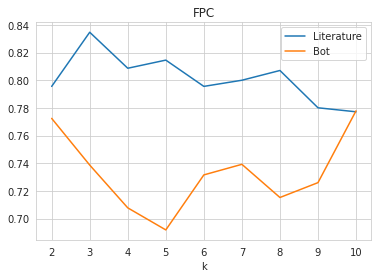

In [6]:
sns.set_style('whitegrid')
plt.title('FPC')
plt.xlabel('k')
plt.plot(range(2,11), fpcs, label='Literature')
plt.plot(range(2,11), fpcs_bot, label='Bot')
plt.legend()
plt.show()

In [7]:
import pandas as pd
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [8]:
from tqdm.notebook import tqdm, trange

In [9]:
lit_data = []
bot_data = []
for ncenters in trange(2,11):
    lit_data.append(fuzz.cluster.cmeans(    # cntr, u, u0, d, jm, p, fpc
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None))
    bot_data.append(fuzz.cluster.cmeans(
        alldata_bot, ncenters, 2, error=0.005, maxiter=1000, init=None))

  0%|          | 0/9 [00:00<?, ?it/s]

Membership values:

In [10]:
for u, u_ in zip([x[1] for x in lit_data], [x[1] for x in bot_data]):
    clusters = pd.DataFrame(u.T).describe().loc[['mean', 'std']]
    clusters_bot = pd.DataFrame(u_.T).describe().loc[['mean', 'std']]
    display_side_by_side(clusters, clusters_bot)

,0,1
mean,0.319721,0.680279
std,0.333518,0.333518
,0,1
mean,0.461194,0.538806
std,0.367081,0.367081


,0,1,2
mean,0.224329,0.213849,0.561822
std,0.349907,0.346028,0.425315
,0,1,2
mean,0.282585,0.350457,0.366958
std,0.342639,0.386376,0.367088


,0,1,2,3
mean,0.113480,0.195266,0.171924,0.519330
std,0.259209,0.337899,0.293979,0.435906
,0,1,2,3
mean,0.238418,0.280156,0.296289,0.185136
std,0.333211,0.374585,0.358029,0.266305


,0,1,2,3,4
mean,0.510381,0.160757,0.101487,0.043351,0.184024
std,0.437993,0.288743,0.251130,0.135552,0.328106
,0,1,2,3,4
mean,0.198827,0.094453,0.273184,0.166053,0.267482
std,0.313524,0.214077,0.362148,0.263657,0.377157


,0,1,2,3,4,5
mean,0.133906,0.476666,0.114327,0.093147,0.034670,0.147285
std,0.274936,0.448135,0.286050,0.250824,0.135276,0.293106
,0,1,2,3,4,5
mean,0.180332,0.117021,0.243066,0.131896,0.084456,0.243230
std,0.313306,0.218030,0.375950,0.251480,0.210113,0.357175


,0,1,2,3,4,5,6
mean,0.084864,0.121430,0.109130,0.113146,0.121673,0.030645,0.419111
std,0.247825,0.284197,0.285096,0.218331,0.271444,0.133481,0.436814
,0,1,2,3,4,5,6
mean,0.223614,0.083327,0.079816,0.230685,0.110136,0.172548,0.099873
std,0.375419,0.178899,0.207553,0.354294,0.240676,0.311503,0.211678


,0,1,2,3,4,5,6,7
mean,0.028188,0.094087,0.101885,0.092248,0.082016,0.113964,0.085497,0.402115
std,0.132199,0.254433,0.282270,0.215051,0.246741,0.282205,0.214526,0.441790
,0,1,2,3,4,5,6,7
mean,0.074063,0.220741,0.088891,0.083398,0.093223,0.062529,0.213873,0.163282
std,0.206549,0.353816,0.219134,0.207829,0.233528,0.208882,0.380715,0.313329


,0,1,2,3,4,5,6,7,8
mean,0.098948,0.112217,0.090018,0.026244,0.080582,0.398935,0.090199,0.019997,0.082860
std,0.278950,0.281066,0.213167,0.128732,0.245142,0.441247,0.249773,0.079350,0.211441
,0,1,2,3,4,5,6,7,8
mean,0.060615,0.145700,0.198453,0.086097,0.060423,0.211324,0.074942,0.084255,0.07819
std,0.195649,0.305629,0.344218,0.232220,0.208322,0.381483,0.202993,0.219047,0.20758


,0,1,2,3,4,5,6,7,8,9
mean,0.053700,0.088241,0.073795,0.327843,0.074863,0.025613,0.099567,0.068626,0.075149,0.112602
std,0.191213,0.250284,0.201890,0.406538,0.236202,0.128833,0.280792,0.203638,0.232162,0.210048
,0,1,2,3,4,5,6,7,8,9
mean,0.059468,0.143700,0.084255,0.081520,0.203561,0.073615,0.074854,0.052054,0.030332,0.196641
std,0.195288,0.305252,0.231662,0.219424,0.381667,0.203028,0.207140,0.201590,0.146199,0.343836


18/05/2021

*21/05/2021 Crisp clustering on fuzzy data*

Pipeline: $x_i \rightarrow \mu_i \rightarrow [\text{with parameters } \Delta c, L, R] \xrightarrow{*} \tilde{x_i} \rightarrow distances(\tilde{X}, \tilde{X}) \rightarrow Wishart$

*$ \mu_i$ for left or right slope (coin flip)

$$(x_i, \mu_i) \rightarrow \tilde{x}_i = (m_{1,i}, m_{2,i}, \ell_i, r_i)$$

$d(x_i,x_j) = \big(||m_{1,i}-m_{1,j}||^2 + ||m_{2,i}-m_{2,j}||^2 + ||(m_{1,i}-\lambda \ell_i) -(m_{1,j}-\lambda\ell_{j})||^2 + ||(m_{1,i}+\rho r_i) -(m_{1,j}+\rho r_{j})||^2\big)^{1/2}$

0. fuzzify (params: $\lambda, \rho (L, R), m, \Delta c)$
1. calculate distances
2. wishart on distances

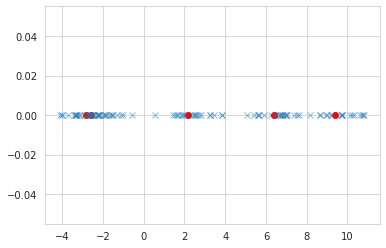

In [12]:
from sklearn.datasets import make_blobs
X, y, centers = make_blobs(n_features=1, centers=5, return_centers=True)
mus = np.random.uniform(0,1,X.shape).reshape(-1)

sns.set_style('whitegrid')
plt.plot(X, np.zeros_like(X), 'x',alpha=.5)
plt.scatter(centers, np.zeros_like(centers), c='r',alpha=1)
plt.show()

In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
from fuzzifier import draw_trapmf, mu_func, mu_func_2, fuzzy_distance, Fuzzifier

***Fuzzification***

mu_func with sympy; mu_func_2 with analytical solution (for trapezoidal membership function)

In [15]:
mu_func([0.5], np.array([[1,2]]), np.array([[1,0]]), 5, 2, 2)

Fuzzifying...:   0%|          | 0/1 [00:00<?, ?it/s]

(array([[ 1.58578644, -3.58578644]]),
 array([[6.58578644, 1.41421356]]),
 array([[1, 0]]))

In [16]:
from sklearn.datasets import make_blobs
X, y, centers = make_blobs(n_features=2, centers=5, return_centers=True)

mus = np.random.uniform(0,1,X.shape).reshape(-1)

m1, m2, p = mu_func(mus, X)

Fuzzifying...:   0%|          | 0/100 [00:00<?, ?it/s]

In [18]:
%%timeit
mu_func(mus, X, verbose=False)

6.31 s ± 159 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Analytical solution:

In [19]:
m1, m2, p = mu_func_2(mus, X)

Fuzzifying...:   0%|          | 0/100 [00:00<?, ?it/s]

In [20]:
ps = np.random.binomial(n=1,size=X.shape, p=0.5)    # probability for left/right slope

In [32]:
m1, m2, p = mu_func(mus, X, ps=ps, verbose=False)

In [33]:
m1_2, m2_2, p = mu_func_2(mus, X, ps=ps, verbose=False)

In [34]:
%%timeit
mu_func_2(mus, X, verbose=False)

3.26 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Fuzzifying...:   0%|          | 0/5 [00:00<?, ?it/s]

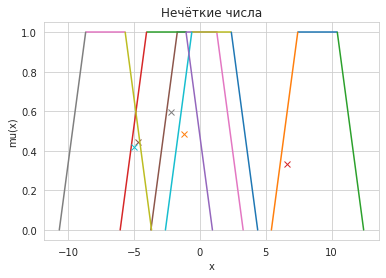

In [43]:
import random
someidx = random.sample(range(X.shape[0]), 5)
sns.set_style('whitegrid')
m1, m2, p = mu_func(mus[someidx], X[someidx])
fig, axs = plt.subplots(1,1,figsize=(6,4))
for ft, ax in zip(range(X.shape[1]-1), [axs]):
    ax.set(ylabel='mu(x)', xlabel='x')
    ax.set_title('Нечёткие числа')
    for x, mu, m1_, m2_ in zip(X[someidx,ft], mus[someidx],m1[:,ft],m2[:,ft]):
        draw_trapmf(m1_, m2_, ax, x=x, mu=mu)

Fuzzifying...:   0%|          | 0/5 [00:00<?, ?it/s]

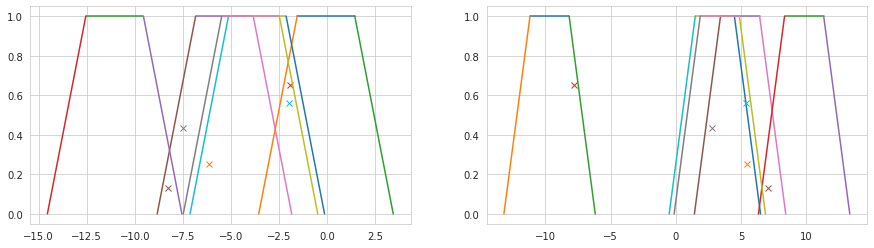

In [46]:
import random
someidx = random.sample(range(X.shape[0]), 5)
sns.set_style('whitegrid')
m1, m2, p = mu_func(mus[someidx], X[someidx])
fig, axs = plt.subplots(1,2,figsize=(15,4))
for ft, ax in zip(range(X.shape[1]), axs.reshape(-1)):
    for x, mu, m1_, m2_ in zip(X[someidx,ft], mus[someidx],m1[:,ft],m2[:,ft]):
        draw_trapmf(m1_, m2_, ax, x=x, mu=mu)

***Calculating distances***

In [47]:
from scipy.spatial.distance import pdist

In [48]:
X_fuzzy = list(zip(m1, m2, np.full(X.shape[0], 2), np.full(X.shape[0], 2)))

In [49]:
fuzzy_distance((m1[0],m2[0],2,2), (m1[1],m2[1],2,2))

31.0554030431104

In [50]:
%%timeit
pdist(X_fuzzy, fuzzy_distance)

/home/quynhu/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


679 µs ± 67.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
pdist(X_fuzzy, fuzzy_distance)

array([31.05540304, 26.32533342, 44.7943369 , 27.2495735 ,  5.1614231 ,
       15.06793065,  4.1274219 , 20.19346624,  1.0344092 , 19.16226479])

In [53]:
X_5, y_5 = make_blobs(n_features=5,centers=4)
mu_5 = np.random.uniform(0,1,X_5.shape[0])

X_5_fuzzy = Fuzzifier(2,2,3).fuzzify(X_5, mu_5)

X_5_fuzzy[0]

Fuzzifying...:   0%|          | 0/100 [00:00<?, ?it/s]

array([array([  1.13306141,   0.51822976,  -4.94223832,   5.18267802,
              -11.51267027])                                         ,
       array([ 4.13306141,  3.51822976, -1.94223832,  8.18267802, -8.51267027]),
       2, 2], dtype=object)

In [54]:
fz = Fuzzifier(2,2,3)
fz.fuzzify(X[someidx],mus[someidx])

Fuzzifying...:   0%|          | 0/5 [00:00<?, ?it/s]

array([[array([ -1.54703133, -11.18465695]),
        array([ 1.45296867, -8.18465695]), 2, 2],
       [array([-11.18944844,   3.41618518]),
        array([-8.18944844,  6.41618518]), 2, 2],
       [array([-10.10229957,   6.46440806]),
        array([-7.10229957,  9.46440806]), 2, 2],
       [array([-6.98437144,  2.76396151]),
        array([-3.98437144,  5.76396151]), 2, 2],
       [array([-1.46430251,  5.87140359]),
        array([1.53569749, 8.87140359]), 2, 2]], dtype=object)

***Find K-neighbors***

In [55]:
from sklearn.neighbors import NearestNeighbors

In [56]:
from scipy.spatial.distance import squareform
X_dist = squareform(pdist(X_fuzzy, fuzzy_distance))

In [57]:
nn = NearestNeighbors(n_neighbors=2, metric='precomputed')
nn.fit(X_dist)

NearestNeighbors(metric='precomputed', n_neighbors=2)

In [58]:
X_dist

array([[ 0.        , 31.05540304, 26.32533342, 44.7943369 , 27.2495735 ],
       [31.05540304,  0.        ,  5.1614231 , 15.06793065,  4.1274219 ],
       [26.32533342,  5.1614231 ,  0.        , 20.19346624,  1.0344092 ],
       [44.7943369 , 15.06793065, 20.19346624,  0.        , 19.16226479],
       [27.2495735 ,  4.1274219 ,  1.0344092 , 19.16226479,  0.        ]])

In [59]:
nn.kneighbors(X_dist, return_distance=True)

(array([[ 0.        , 26.32533342],
        [ 0.        ,  4.1274219 ],
        [ 0.        ,  1.0344092 ],
        [ 0.        , 15.06793065],
        [ 0.        ,  1.0344092 ]]), array([[0, 2],
        [1, 4],
        [2, 4],
        [3, 1],
        [4, 2]]))

In [60]:
distances, neighbors = nn.kneighbors(X_dist, return_distance=True)

distances[:,-1]

array([26.32533342,  4.1274219 ,  1.0344092 , 15.06793065,  1.0344092 ])

***Wishart on fuzzy data***

In [62]:
from Wishart_fuzzy import Wishart_fuzzy

In [63]:
wf = Wishart_fuzzy(3,0.2,2,2,5)

wf.fit(X, mus)

Fuzzifying...:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating distances


100%|██████████| 100/100 [00:00<00:00, 17108.44it/s]

Distances calculated, 0.402740
Finding neighbors
Neighbors found, time 0.000820


In [64]:
#wf = Wishart_fuzzy(3,0.2,2,2,5)

wf.fit(X, np.ones(X.shape[0]), verbose=False)

Fuzzifying...:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating distances
Distances calculated, 0.287281
Finding neighbors
Neighbors found, time 0.000980


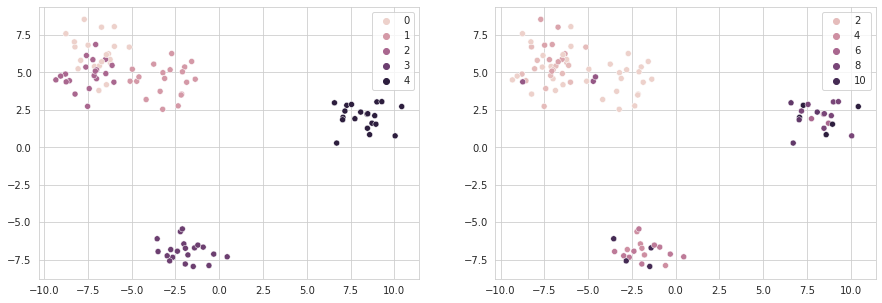

In [65]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axs[0])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=wf.object_labels, ax=axs[1])
plt.show()